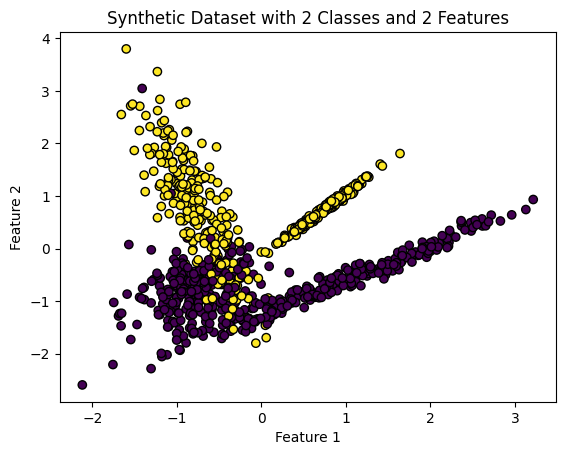

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

# Create a synthetic dataset with 1000 samples, 2 classes, and 2 features
samples, labels = make_classification(n_samples=1000, n_features=2, n_classes=2,
n_clusters_per_class=2,class_sep=0.75, n_redundant=0, random_state=33)

# Plot the synthetic dataset
plt.scatter(samples[:, 0], samples[:, 1], c=labels, cmap='viridis', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic Dataset with 2 Classes and 2 Features')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(samples, labels, test_size=0.2, random_state=33)

# Combine training and test sets into one dataset
x_combined = np.concatenate((x_train, x_test), axis=0)
y_combined = np.concatenate((y_train, y_test), axis=0)



Logistic Regression Accuracy: 0.925
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       110
           1       0.93      0.90      0.92        90

    accuracy                           0.93       200
   macro avg       0.93      0.92      0.92       200
weighted avg       0.93      0.93      0.92       200



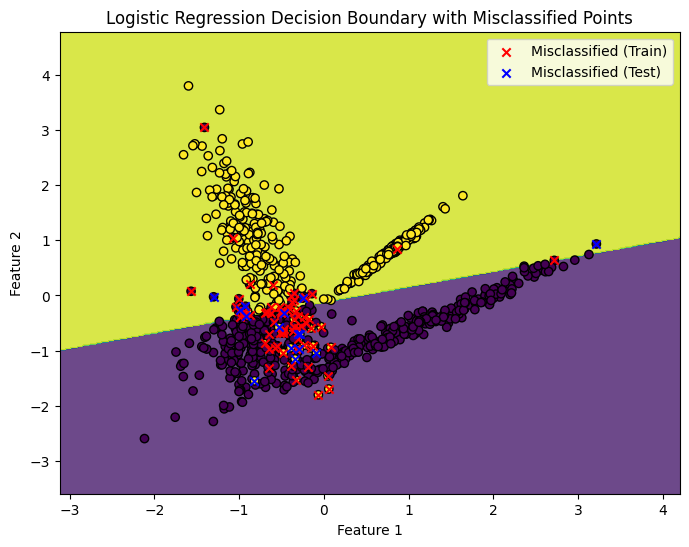

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Create Logistic Regression model
logistic_model = LogisticRegression(random_state=33)

# Train the model on the training set
logistic_model.fit(x_train, y_train)

# Predict on the test set
logistic_predictions = logistic_model.predict(x_test)

# Evaluate the model
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
print(f"Logistic Regression Accuracy: {logistic_accuracy}")
print("Classification Report:")
print(classification_report(y_test, logistic_predictions))

# Predict on the training set
y_pred_train = logistic_model.predict(x_train)
# Predict on the test set
y_pred_test = logistic_model.predict(x_test)

# Visualize the decision boundary and all data points
plt.figure(figsize=(8, 6))

# Create a meshgrid of feature values
h = .02  # Step size in the mesh
x_min, x_max = x_combined[:, 0].min() - 1, x_combined[:, 0].max() + 1
y_min, y_max = x_combined[:, 1].min() - 1, x_combined[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the labels for each point in the meshgrid
Z = logistic_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.8)

# Plot all data points
plt.scatter(x_combined[:, 0], x_combined[:, 1], c=y_combined, cmap='viridis', edgecolors='k', marker='o')

# Plot misclassified points from both training and test sets
misclassified_train = x_train[y_train != y_pred_train]
misclassified_test = x_test[y_test != y_pred_test]

plt.scatter(misclassified_train[:, 0], misclassified_train[:, 1], c='red', marker='x', label='Misclassified (Train)')
plt.scatter(misclassified_test[:, 0], misclassified_test[:, 1], c='blue', marker='x', label='Misclassified (Test)')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary with Misclassified Points')
plt.legend()
plt.show()


Linear SVM (SGD) Accuracy: 0.915
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       110
           1       0.94      0.87      0.90        90

    accuracy                           0.92       200
   macro avg       0.92      0.91      0.91       200
weighted avg       0.92      0.92      0.91       200



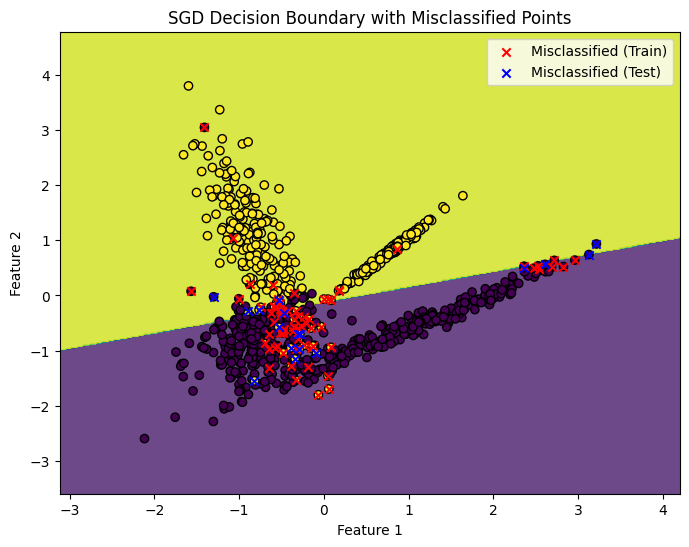

In [ ]:
from sklearn.linear_model import SGDClassifier

# Create SGDClassifier with Hinge Loss (commonly used for linear SVM)
linear_svm_sgd = SGDClassifier(loss='hinge', max_iter=1000, random_state=33)

# Train the model
linear_svm_sgd.fit(x_train, y_train)

# Predictions on the test set
linear_svm_sgd_predictions = linear_svm_sgd.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, linear_svm_sgd_predictions)
print(f"Linear SVM (SGD) Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, linear_svm_sgd_predictions))

# Predict on the training set
y_pred_train = linear_svm_sgd.predict(x_train)
# Predict on the test set
y_pred_test = linear_svm_sgd.predict(x_test)

# Visualize the decision boundary and all data points
plt.figure(figsize=(8, 6))

# Create a meshgrid of feature values
h = .02  # Step size in the mesh
x_min, x_max = x_combined[:, 0].min() - 1, x_combined[:, 0].max() + 1
y_min, y_max = x_combined[:, 1].min() - 1, x_combined[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the labels for each point in the meshgrid
Z = logistic_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.8)

# Plot all data points
plt.scatter(x_combined[:, 0], x_combined[:, 1], c=y_combined, cmap='viridis', edgecolors='k', marker='o')

# Plot misclassified points from both training and test sets
misclassified_train = x_train[y_train != y_pred_train]
misclassified_test = x_test[y_test != y_pred_test]

plt.scatter(misclassified_train[:, 0], misclassified_train[:, 1], c='red', marker='x', label='Misclassified (Train)')
plt.scatter(misclassified_test[:, 0], misclassified_test[:, 1], c='blue', marker='x', label='Misclassified (Test)')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SGD Decision Boundary with Misclassified Points')
plt.legend()
plt.show()
